In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("ESPN_IPL.csv")
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,V Kohli (RCB),2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258
1,1,S Dhawan (DC/DCH/MI/PBKS/SRH),2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,2,DA Warner (DC/SRH),2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236
3,3,RG Sharma (DCH/MI),2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276
4,4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


In [8]:
df = df.drop(["Unnamed: 0"],axis=1)
df


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (RCB),2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258
1,S Dhawan (DC/DCH/MI/PBKS/SRH),2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,DA Warner (DC/SRH),2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236
3,RG Sharma (DCH/MI),2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276
4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,PC Valthaty (KXIP/RR),2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20
146,SW Billings (CSK/DC/KKR),2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20
147,MK Lomror (RCB/RR),2018-2024,36,31,5,482,54*,18.53,345,139.71,0,1,2,31,27
148,DT Christian (DC/DCH/RCB/RPS),2011-2021,49,41,10,460,39,14.83,398,115.57,0,0,2,23,19


In [9]:
# Getting the player details with maximum number of matches played
df.loc[df['Mat'].idxmax()]

Player    MS Dhoni (CSK/RPS)
Span               2008-2024
Mat                      261
Inns                     227
NO                        94
Runs                    5192
HS                       84*
Ave                    39.03
BF                      3788
SR                    137.06
100                        0
50                        24
0                          6
4s                       359
6s                       248
Name: 5, dtype: object

In [10]:
df.dtypes

Player     object
Span       object
Mat         int64
Inns        int64
NO          int64
Runs        int64
HS         object
Ave       float64
BF          int64
SR        float64
100         int64
50          int64
0           int64
4s          int64
6s          int64
dtype: object

In [11]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0', '4s', '6s'],
      dtype='object')

In [12]:
df["NO"].where(df["NO"]=="-")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: NO, Length: 150, dtype: float64

In [13]:
# Removing special characters
#df.replace(r'[\W]', '', inplace=True, regex=True)

In [14]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (RCB),2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258
1,S Dhawan (DC/DCH/MI/PBKS/SRH),2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,DA Warner (DC/SRH),2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236
3,RG Sharma (DCH/MI),2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276
4,SK Raina (CSK/GL),2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
5,MS Dhoni (CSK/RPS),2008-2024,261,227,94,5192,84*,39.03,3788,137.06,0,24,6,359,248
6,AB de Villiers (DC/RCB),2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
7,CH Gayle (KKR/KXIP/PBKS/RCB),2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa (CSK/KKR/MI/PWI/RCB/RR),2008-2022,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182
9,KD Karthik (DC/GL/KKR/KXIP/MI/RCB),2008-2024,253,230,50,4799,97*,26.66,3549,135.22,0,22,17,463,158


In [15]:
players_Teams = []
playername = []
teamname = []
for i in range(0,len(df["Player"])):

    player = df["Player"][i]

    x = df["Player"][i].split(" (",1)
    players_Teams.append(x)

for i in range(0,len(players_Teams)):
    playername.append(players_Teams[i][0])
    teamname.append(players_Teams[i][1])
    #df["Player"] = players_Teams[i][0]
print(playername)
print(teamname)

    #print(player)

['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina', 'MS Dhoni', 'AB de Villiers', 'CH Gayle', 'RV Uthappa', 'KD Karthik', 'KL Rahul', 'AM Rahane', 'F du Plessis', 'SV Samson', 'AT Rayudu', 'G Gambhir', 'SR Watson', 'MK Pandey', 'SA Yadav', 'JC Buttler', 'KA Pollard', 'RR Pant', 'YK Pathan', 'Q de Kock', 'Shubman Gill', 'SS Iyer', 'WP Saha', 'DA Miller', 'RA Jadeja', 'BB McCullum', 'PA Patel', 'GJ Maxwell', 'Yuvraj Singh', 'V Sehwag', 'MA Agarwal', 'M Vijay', 'N Rana', 'Ishan Kishan', 'HH Pandya', 'SPD Smith', 'SE Marsh', 'AD Russell', 'JH Kallis', 'DR Smith', 'RD Gaikwad', 'SR Tendulkar', 'R Dravid', 'KS Williamson', 'RA Tripathi', 'AJ Finch', 'AC Gilchrist', 'JP Duminy', 'MEK Hussey', 'PP Shaw', 'MP Stoinis', 'DPMD Jayawardene', 'Mandeep Singh', 'MK Tiwary', 'KC Sangakkara', 'N Pooran', 'KH Pandya', 'AR Patel', 'DJ Bravo', 'D Padikkal', 'NV Ojha', 'JM Bairstow', 'SP Narine', 'KK Nair', 'SS Tiwary', 'YBK Jaiswal', 'S Dube', 'DJ Hooda', 'S Badrinath', 'EJG Morgan', 'BJ Hodge',

In [16]:
#player.split(" (",1)
df['Player'] = playername
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258
1,S Dhawan,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236
3,RG Sharma,2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203


In [17]:
for i in range(0,len(teamname)):
    x = teamname[i]
x = x.split("/", 1), x.split(")", 1)
x
# df['team'] = df['team'].str.replace('avs', '')

    #print(teamname)

(['DC', 'KKR/SRH)'], ['DC/KKR/SRH', ''])

In [18]:
df["Team Name"] = teamname
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
0,V Kohli,2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258,RCB)
1,S Dhawan,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,DC/DCH/MI/PBKS/SRH)
2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236,DC/SRH)
3,RG Sharma,2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276,DCH/MI)
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,CSK/GL)


In [19]:
#df.replace(r'[\W]', '', inplace=True, regex=True)
df['Team Name'] = df['Team Name'].str.replace(')', '')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
0,V Kohli,2008-2024,248,240,37,7805,113*,38.44,5952,131.13,8,54,10,691,258,RCB
1,S Dhawan,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,DC/DCH/MI/PBKS/SRH
2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236,DC/SRH
3,RG Sharma,2008-2024,255,250,29,6541,109*,29.59,4992,131.02,2,42,17,588,276,DCH/MI
4,SK Raina,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,CSK/GL


In [20]:
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
140,JP Faulkner,2011-2017,60,45,20,527,46,21.08,389,135.47,0,0,0,36,23,GL/KXIP/PWI/RR
141,M Manhas,2008-2014,55,38,15,514,42*,22.34,470,109.36,0,0,6,43,10,CSK/DC/PWI
142,Gurkeerat Singh,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11,KXIP/RCB
143,Shahbaz Ahmed,2020-2024,51,33,9,507,59*,21.12,408,124.26,0,1,0,28,23,RCB/SRH
144,OA Shah,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23,KKR/Kochi/RR
145,PC Valthaty,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20,KXIP/RR
146,SW Billings,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20,CSK/DC/KKR
147,MK Lomror,2018-2024,36,31,5,482,54*,18.53,345,139.71,0,1,2,31,27,RCB/RR
148,DT Christian,2011-2021,49,41,10,460,39,14.83,398,115.57,0,0,2,23,19,DC/DCH/RCB/RPS
149,PJ Cummins,2014-2024,54,38,14,456,66*,19.00,296,154.05,0,3,4,28,31,DC/KKR/SRH


In [21]:
# df1 = df.sort_values(by='Mat',ascending=False)
# df1

In [22]:
cols = ['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs',
        'HS', 'Ave', 'BF', 'SR', '100s', '50s', '0', '4s', '6s']
df1 = df.loc[:, df.columns != 'Team Name']
df1 = df1.loc[:, df1.columns != 'Player']
df1 = df1.loc[:, df1.columns != 'Span']
df1 = df1.loc[:, df1.columns != 'HS']
df1.replace(r'[\W]', '0', inplace=True, regex=True)
df1["Team Name"] = df["Team Name"]
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
140,JP Faulkner,2011-2017,60,45,20,527,46,21.08,389,135.47,0,0,0,36,23,GL/KXIP/PWI/RR
141,M Manhas,2008-2014,55,38,15,514,42*,22.34,470,109.36,0,0,6,43,10,CSK/DC/PWI
142,Gurkeerat Singh,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11,KXIP/RCB
143,Shahbaz Ahmed,2020-2024,51,33,9,507,59*,21.12,408,124.26,0,1,0,28,23,RCB/SRH
144,OA Shah,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23,KKR/Kochi/RR
145,PC Valthaty,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20,KXIP/RR
146,SW Billings,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20,CSK/DC/KKR
147,MK Lomror,2018-2024,36,31,5,482,54*,18.53,345,139.71,0,1,2,31,27,RCB/RR
148,DT Christian,2011-2021,49,41,10,460,39,14.83,398,115.57,0,0,2,23,19,DC/DCH/RCB/RPS
149,PJ Cummins,2014-2024,54,38,14,456,66*,19.00,296,154.05,0,3,4,28,31,DC/KKR/SRH


In [23]:
df['NO'] = df1['NO']
df['100'] = df1['100']
df['50'] = df1['50']
#df['HS'] = df1['HS']
df['0'] = df1['0']
######################################
df1['HS'] = df['HS']
df1.replace(r'[\W]', '', inplace=True, regex=True)
df['HS'] = df1['HS']
df.tail(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
140,JP Faulkner,2011-2017,60,45,20,527,46,21.08,389,135.47,0,0,0,36,23,GL/KXIP/PWI/RR
141,M Manhas,2008-2014,55,38,15,514,42,22.34,470,109.36,0,0,6,43,10,CSK/DC/PWI
142,Gurkeerat Singh,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11,KXIP/RCB
143,Shahbaz Ahmed,2020-2024,51,33,9,507,59,21.12,408,124.26,0,1,0,28,23,RCB/SRH
144,OA Shah,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23,KKR/Kochi/RR
145,PC Valthaty,2009-2013,23,23,1,505,120,22.95,418,120.81,1,2,1,60,20,KXIP/RR
146,SW Billings,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20,CSK/DC/KKR
147,MK Lomror,2018-2024,36,31,5,482,54,18.53,345,139.71,0,1,2,31,27,RCB/RR
148,DT Christian,2011-2021,49,41,10,460,39,14.83,398,115.57,0,0,2,23,19,DC/DCH/RCB/RPS
149,PJ Cummins,2014-2024,54,38,14,456,66,19.00,296,154.05,0,3,4,28,31,DC/KKR/SRH


In [24]:
#df.to_csv('ESPN_IPL_clean.csv')

In [25]:

df.dtypes


Player        object
Span          object
Mat            int64
Inns           int64
NO             int64
Runs           int64
HS            object
Ave          float64
BF             int64
SR           float64
100            int64
50             int64
0              int64
4s             int64
6s             int64
Team Name     object
dtype: object

In [26]:
# Converting 'object' to 'int64'
df['HS'] = df['HS'].astype('Int64')
df['100'] = df['100'].astype('Int64')
df['50'] = df['50'].astype('Int64')
df['0'] = df['0'].astype('Int64')
df['NO'] = df['NO'].astype('Int64')

In [27]:
type(df['HS'][0])

numpy.int64

In [28]:
#df = df.rename(columns={'100s': '', 'oldName2': 'newName2'})

### Plot for top 10 highest scores in IPL

In [29]:
top_10_scores = df.sort_values(by = 'HS', ascending = False).reset_index()[:10]
top_10_scores.head(15)
#sns.barplot(data = df, x = df['HS'], y = df['Player'],orient='h')

,index,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
0,7,CH Gayle,2009-2021,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,KKR/KXIP/PBKS/RCB
1,29,BB McCullum,2008-2018,109,109,5,2880,158,27.69,2186,131.74,2,13,6,293,130,CSK/GL/KKR/Kochi/RCB
2,23,Q de Kock,2013-2024,106,106,6,3145,140,31.45,2344,134.17,2,23,4,314,123,DC/LSG/MI/RCB/SRH
3,6,AB de Villiers,2008-2021,184,170,40,5162,133,39.70,3403,151.68,3,40,10,413,251,DC/RCB
4,10,KL Rahul,2013-2024,130,121,20,4623,132,45.77,3435,134.58,4,36,4,396,184,KXIP/LSG/PBKS/RCB/SRH
5,24,Shubman Gill,2018-2024,102,99,15,3112,129,37.04,2315,134.42,3,20,4,301,89,GT/KKR
6,21,RR Pant,2016-2024,110,109,17,3251,128,35.33,2182,148.99,1,18,4,291,154,DC
7,35,M Vijay,2009-2020,106,106,5,2619,127,25.93,2149,121.87,2,13,5,247,91,CSK/DC/KXIP
8,2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236,DC/SRH
9,54,MP Stoinis,2016-2024,94,86,22,1833,124,28.64,1285,142.64,1,9,9,144,91,DC/KXIP/LSG/RCB


C:\Users\HP\AppData\Local\Temp\ipykernel_23628\967806513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df, x = top_10_scores['HS'],y=top_10_scores['Player'],palette='flare')


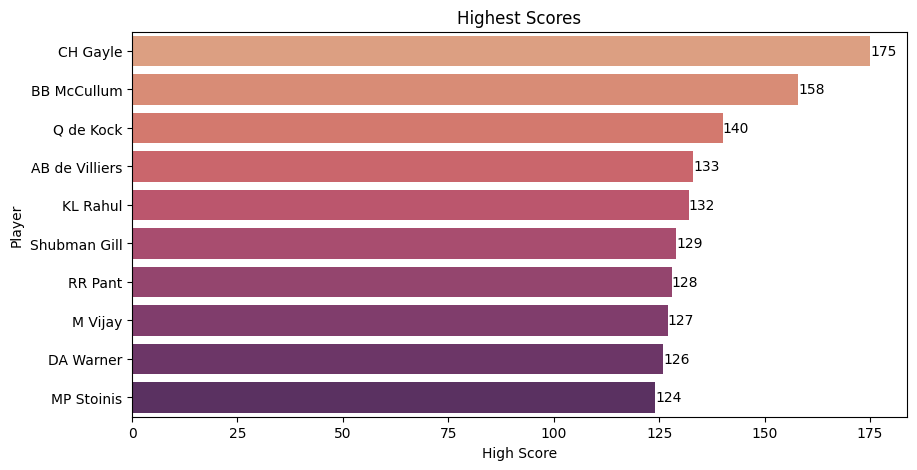

In [30]:
plt.figure(figsize=(10, 5))
plt.title("Highest Scores")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(data = df, x = top_10_scores['HS'],y=top_10_scores['Player'],palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [31]:
top_10_100s = df.sort_values(by='100', ascending=False).reset_index()[:15]
top_10_100s.head(4)

,index,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
0,0,V Kohli,2008-2024,248,240,37,7805,113,38.44,5952,131.13,8,54,10,691,258,RCB
1,19,JC Buttler,2016-2024,106,105,12,3561,124,38.29,2403,148.18,7,19,7,353,161,MI/RR
2,7,CH Gayle,2009-2021,142,141,16,4965,175,39.72,3333,148.96,6,31,8,404,357,KKR/KXIP/PBKS/RCB
3,2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236,DC/SRH


C:\Users\HP\AppData\Local\Temp\ipykernel_23628\1259225279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


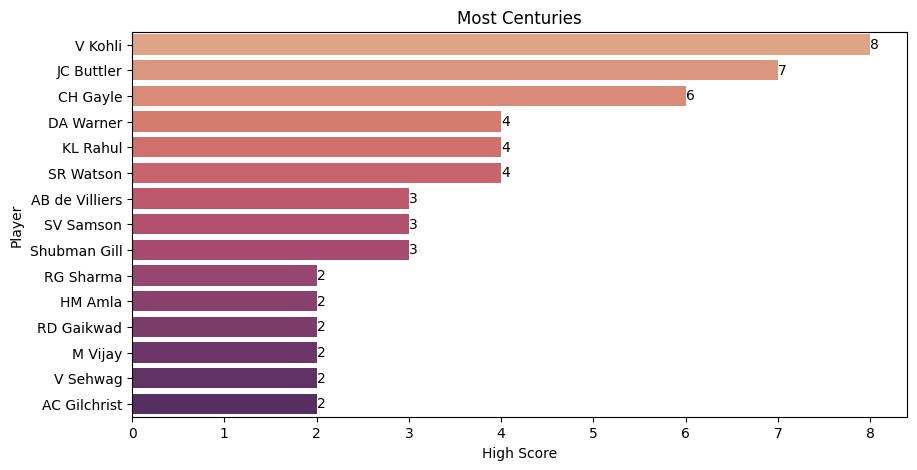

In [32]:
plt.figure(figsize=(10, 5))
plt.title("Most Centuries")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_100s['100'], y=top_10_100s['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23628\2204647889.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


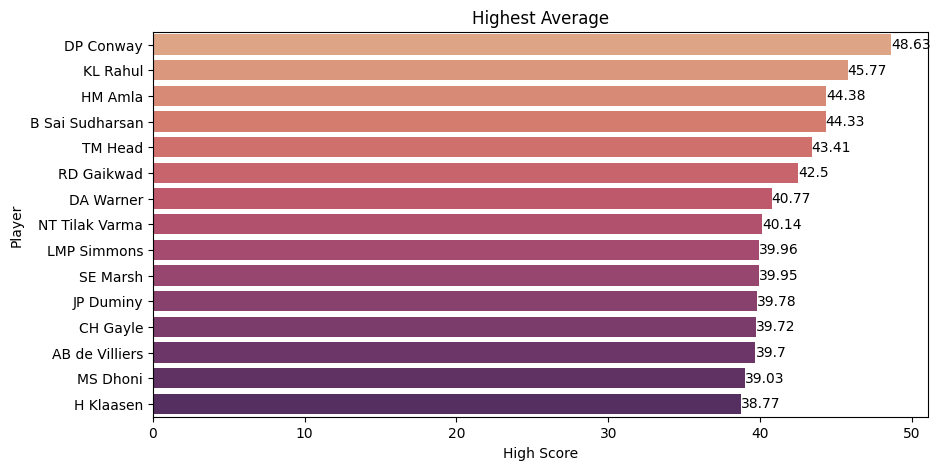

In [33]:
top_10_avg = df.sort_values(by='Ave', ascending=False).reset_index()[:15]
top_10_avg.head(4)
plt.figure(figsize=(10, 5))
plt.title("Highest Average")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_avg['Ave'], y=top_10_avg['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23628\442524622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


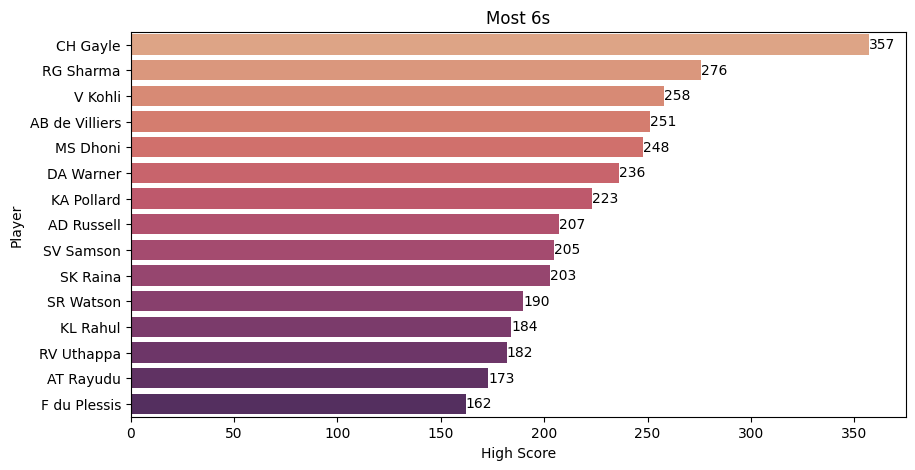

In [34]:
top_10_6s = df.sort_values(by='6s', ascending=False).reset_index()[:15]
top_10_6s.head(4)
plt.figure(figsize=(10, 5))
plt.title("Most 6s")
plt.xlabel(xlabel="High Score")
ax = sns.barplot(
    data=df, x=top_10_6s['6s'], y=top_10_6s['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23628\1711671145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


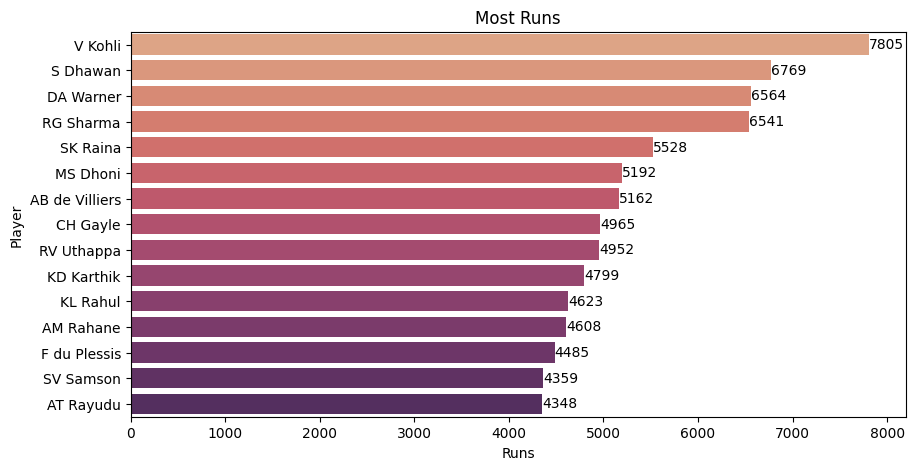

In [35]:
top_10_runs = df.sort_values(by='Runs', ascending=False).reset_index()[:15]
top_10_runs.head(4)
plt.figure(figsize=(10, 5))
plt.title("Most Runs")
ax = sns.barplot(
    data=df, x=top_10_runs['Runs'], y=top_10_runs['Player'], palette='flare')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

<Axes: ylabel='NO'>

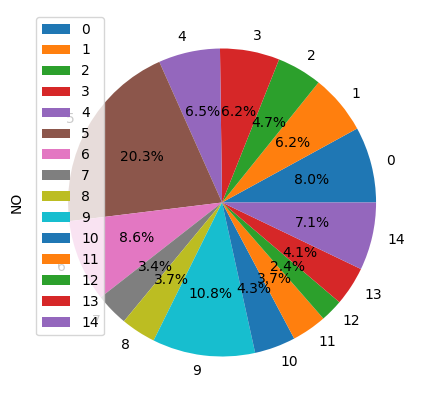

In [36]:
# What percent of top runscorers remain Not-Out most number of times.
top_10_runs.plot.pie(y='NO', figsize=(7,5),autopct='%1.1f%%')

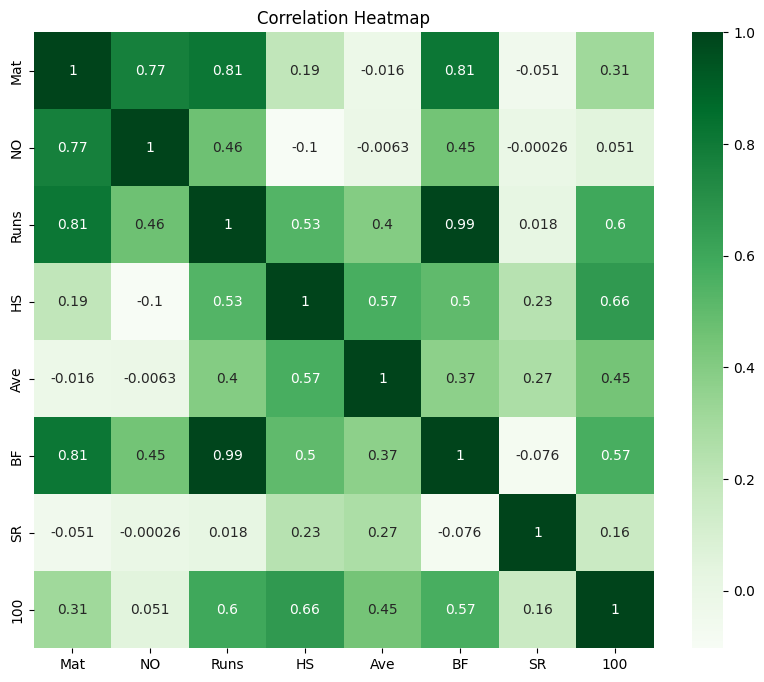

In [37]:
# cols = ['Mat', 'Inns', 'NO', 'Runs',
#         'HS', 'Ave', 'BF', 'SR', '100s', '50s', '0', '4s', '6s']

pairs = df[['Mat', 'NO', 'Runs',
            'HS', 'Ave', 'BF', 'SR', '100']]
corr = pairs.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='Greens')
ax.set_title("Correlation Heatmap")
plt.show()

#sns.heatmap(data=)

In [38]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team Name
0,V Kohli,2008-2024,248,240,37,7805,113,38.44,5952,131.13,8,54,10,691,258,RCB
1,S Dhawan,2008-2024,222,221,29,6769,106,35.25,5324,127.14,2,51,11,768,152,DC/DCH/MI/PBKS/SRH
2,DA Warner,2009-2024,183,183,22,6564,126,40.77,4695,139.80,4,62,11,663,236,DC/SRH
3,RG Sharma,2008-2024,255,250,29,6541,109,29.59,4992,131.02,2,42,17,588,276,DCH/MI
4,SK Raina,2008-2021,205,200,30,5528,100,32.51,4043,136.73,1,39,8,506,203,CSK/GL


In [80]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso, Ridge


In [79]:

# Load the data (assuming you have a CSV file with your batsmen stats)
data = df
# Define features and target variable
features = ['Mat', 'NO', 'Runs', 'BF',
            'SR', 'HS', '100', '50']
target = 'Ave'  # Predicting the batting average

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[target], test_size=0.2, random_state=42)


In [81]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 13.087578634717083
R² Score: 0.5433035907389285


In [42]:

# # For Lasso (L1 regularization)
# lasso_model = Lasso(alpha=0.9002)
# lasso_model.fit(X_train, y_train)
# # Make predictions on the test set
# y_pred_lasso = lasso_model.predict(X_test)

# # Evaluate the Lasso regression model
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')


In [82]:

# For Lasso (L1 regularization)
lasso_model = Lasso(alpha=0.8000002)
lasso_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
r2 = r2_score(y_test, y_pred)
print(f'Lasso Regression - R² Score: {r2}')

Lasso Regression - Mean Squared Error: 12.489131455014986
Lasso Regression - R² Score: 0.5433035907389285


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.921e+02, tolerance: 6.635e-01
  model = cd_fast.enet_coordinate_descent(


In [44]:
# alpha_values = np.linspace(0.01, 1.0, 100)  # Adjust the range as needed

# # Initialize lists to store alpha values and corresponding MSE
# alphas = []
# mse_values = []
# for alpha in alpha_values:
#     # Initialize and train the Lasso regression model with current alpha
#     lasso_model = Lasso(alpha=alpha)
#     lasso_model.fit(X_train, y_train)

#     # Make predictions on the validation set
#     y_pred = lasso_model.predict(X_train)

#     # Calculate the Mean Squared Error (MSE)
#     mse = mean_squared_error(y_train, y_pred)

#     # Store the alpha value and corresponding MSE
#     alphas.append(alpha)
#     mse_values.append(mse)

# # Plotting the alpha values vs. MSE
# plt.figure(figsize=(10, 6))
# plt.plot(alphas, mse_values, marker='o')
# plt.xlabel('Alpha')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Lasso Regression: MSE vs. Alpha')
# plt.grid(True)
# plt.show()

In [83]:

# Initialize and train the Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
r2 = r2_score(y_test, y_pred)
print(f'Ridge Regression - R² Score: {r2}')

Ridge Regression - Mean Squared Error: 13.085842668696346
Ridge Regression - R² Score: 0.5433035907389285


In [51]:

# Calculate the variance of the predictions
variance_linear = np.var(y_pred)
variance_lasso = np.var(y_pred_lasso)
variance_ridge = np.var(y_pred_ridge)
print(f'Variance of Linear Regression Predictions: {variance_linear}')
print(f'Variance of Lasso Regression Predictions: {variance_lasso}')
print(f'Variance of Ridge Regression Predictions: {variance_ridge}')

# Example prediction
# features = ['Mat', 'NO', 'Runs', 'BF','SR', 'HS', '100s', '50s']
new_data = pd.DataFrame(
    [[60, 12, 1854, 2512, 101.23, 67, 0, 3]], columns=features)
prediction = lasso_model.predict(new_data)
print(f'Predicted Average: {prediction[0]}')

Variance of Linear Regression Predictions: 20.74068962885098
Variance of Lasso Regression Predictions: 20.44451861827256
Variance of Ridge Regression Predictions: 20.740382922049516
Predicted Average: 36.38935487071869


In [52]:
import joblib
joblib.dump(lasso_model,'linear_regression_average_predictor2.pkl')

['linear_regression_average_predictor2.pkl']

In [54]:

# Load the saved model
loaded_model = joblib.load('linear_regression_average_predictor2.pkl')
# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
predictions

array([23.29064525, 30.15549622, 30.05484288, 27.36703821, 31.35430715,
       26.38726554, 24.17889555, 20.35797776, 25.23890589, 27.30193552,
       25.40904154, 32.22805774, 27.00407506, 24.85239127, 34.16311151,
       21.92938637, 25.99274223, 34.11729232, 32.1994966 , 24.93603703,
       32.80708478, 28.51022705, 24.84734236, 34.35482096, 28.00666947,
       31.2108514 , 16.11597819, 22.27464707, 32.63518466, 21.61279767])